<a href="https://colab.research.google.com/github/MauroTercic/trabajo_final_fsoc/blob/main/analisis_exploratorio_desarrollo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis inicial de los datos
Primero que nada planteo cual va a ser mi variable objetivo, en este caso es la de GDP (PBI de ahora en adelante) per cápita. Inicialmente considere usar la de PBI pero me arrepentí ya que la escala de los números hacía muy dificl el análisis y visualización de los datos.
Sabiendo eso calculo cuales son los índices de correlacion entre las variables/
features utilizando el método de Pearson.
En este caso considero que las variables dentro del rango 0,4 y -0,4 no tienen un peso estadistico significante para los objetivos del estudio.

In [104]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Variable considerada global y de valor constante
FILE = "/content/data/worlddata.csv"

# Cargar los datos
df = pd.read_csv(FILE)

In [72]:
# Correlación de los datos
df_1 = df.corr(method="pearson", numeric_only=True)
print(f"Correlaciones:\n{df_1['gdp_capita']}")


# Correlaciones estadisticamente relevantes
relevantes = ["Acceso a la electricidad", "PBI per cápita", "Expectativa de vida", "Analfabetismo",
              "Acceso a agua", "Contaminación del aire", "Soporte social", "Libertad", "Índice de corrupción"]
print("\nVariables estadisticamente relevantes: ")
ind = 0
for i in df_1["gdp_capita"]:
  if i > 0.4 or -0.4 > i:
    print(f"{relevantes[ind]}: {round(i,3)}")
    ind += 1


Correlaciones:
electricity_access     0.416060
gdp                    0.255004
gdp_capita             1.000000
labor_rate             0.162491
labor_force           -0.025137
land_area              0.069496
life_expectancy        0.661409
adult_literacy         0.444419
water_access           0.476845
air_pollution         -0.582037
population_density     0.240723
population            -0.045137
alcohol_consumption    0.380302
unemployment_rate     -0.129740
social_support         0.547560
freedom                0.424359
generosity             0.226221
cpi                    0.807498
Name: gdp_capita, dtype: float64

Variables estadisticamente relevantes: 
Acceso a la electricidad: 0.416
PBI per cápita: 1.0
Expectativa de vida: 0.661
Analfabetismo: 0.444
Acceso a agua: 0.477
Contaminación del aire: -0.582
Soporte social: 0.548
Libertad: 0.424
Índice de corrupción: 0.807


## Preprocesamiento
Sabiendo cuales son las variables estadisticamente relevantes para este estudio, utilizo una herramienta adaptable e interactiva para la eliminación de columnas de un Data Frame de Pandas. Al mismo tiempo, elimino algunos países que poseen demasiadas features vacías.

In [74]:
def dropping_columns(file): # Eliminar las columnas innecesarias

    df_2 = pd.read_csv(file)

    # Poner las categorias en un diccionario
    cols = df_2.columns
    dic = {}
    ind = 0
    for i in cols:
        dic[ind] = i
        ind += 1

    print(f"Estas son las columnas: {dic}")

    to_drop = [] # Lista de las keys de las columnas que se van a eliminar

    # Event loop
    print("Ingresa las llaver numericas de a 1 para las columnas que queres eliminar: ")
    while True:
        inp = input("-")
        if inp == "n":
            break
        else:
            try:
                temp = inp # antes era int(inp) (por si no funciona ahora asi)
                to_drop.append(int(temp))
                print("Para salir escriba 'n'")
            except ValueError:
                print("Input incorrecto")
                break

    print("Estas seguro que queres eliminar estas columnas: ")
    for i in to_drop:
        print(dic[i])
    x = input("y/n: ")
    if x == "y":
        for i in to_drop:
            t = dic[i]
            df_2.drop(t, axis=1, inplace=True)
            df_2.to_csv(file, index=False)
    else:
        return

dropping_columns(FILE)

Estas son las columnas: {0: 'country', 1: 'electricity_access', 2: 'gdp', 3: 'gdp_capita', 4: 'labor_rate', 5: 'labor_force', 6: 'land_area', 7: 'life_expectancy', 8: 'adult_literacy', 9: 'water_access', 10: 'air_pollution', 11: 'population_density', 12: 'population', 13: 'alcohol_consumption', 14: 'unemployment_rate', 15: 'social_support', 16: 'freedom', 17: 'generosity', 18: 'income_class', 19: 'cpi'}
Ingresa las llaver numericas de a 1 para las columnas que queres eliminar: 
-0
Para salir escriba 'n'
-2
Para salir escriba 'n'
-4
Para salir escriba 'n'
-5
Para salir escriba 'n'
-6
Para salir escriba 'n'
-11
Para salir escriba 'n'
-12
Para salir escriba 'n'
-13
Para salir escriba 'n'
-14
Para salir escriba 'n'
-18
Para salir escriba 'n'
-n
Estas seguro que queres eliminar estas columnas: 
country
gdp
labor_rate
labor_force
land_area
population_density
population
alcohol_consumption
unemployment_rate
income_class
y/n: y


In [79]:
# Nueva correlación con las variables a trabajar
df_1 = df.corr(method="pearson")
print(f"Correlaciones relevantes:\n{df_1['gdp_capita']}")

Correlaciones relevantes:
electricity_access    0.416060
gdp_capita            1.000000
life_expectancy       0.661409
adult_literacy        0.444419
water_access          0.476845
air_pollution        -0.582037
social_support        0.547560
freedom               0.424359
generosity            0.226221
cpi                   0.807498
Name: gdp_capita, dtype: float64


Completar las celdas vacías con la media.

In [81]:
def fill_celdas():
  temp = df.columns
  for i in temp:
    if i == "country":
      pass
    else:
      mean_value=df[i].mean()
      df[i].fillna(value=mean_value, inplace=True)
      df.to_csv(FILE, index=False)
  print("Se completaron las celdas vacias con los valores medios")

fill_celdas()

Se completaron las celdas vacias con los valores medios


# Visualización de los datos y análisis de los datos
Con las varaibles a trabajar delimitadas se van a visualizar. Deje la feature de los nombres de los países para uso exclusivo en la visualización.


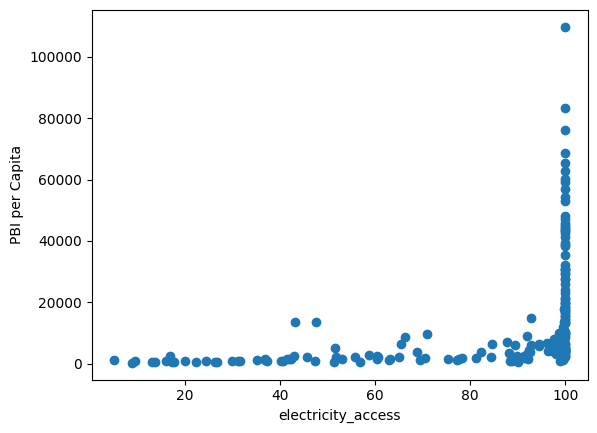

----------------------------------------------------------------------------


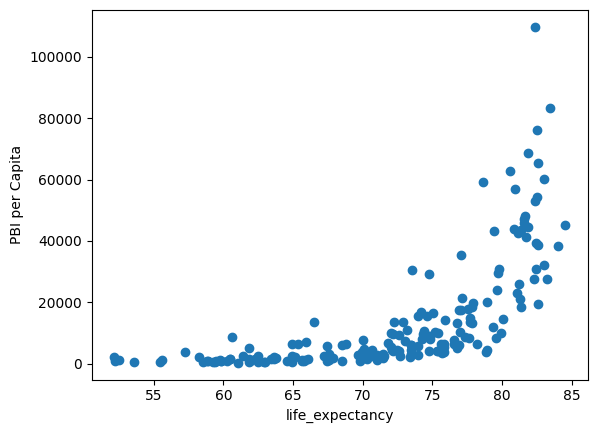

----------------------------------------------------------------------------


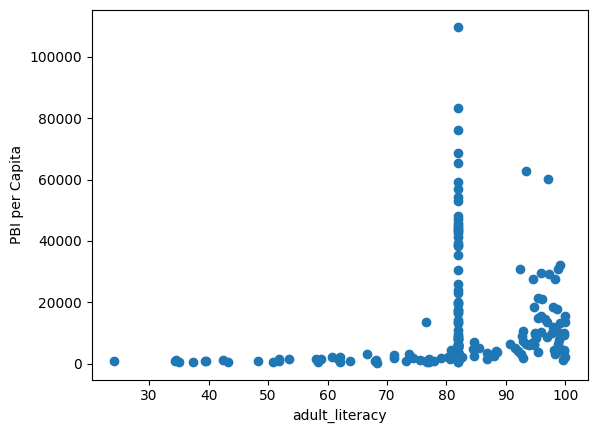

----------------------------------------------------------------------------


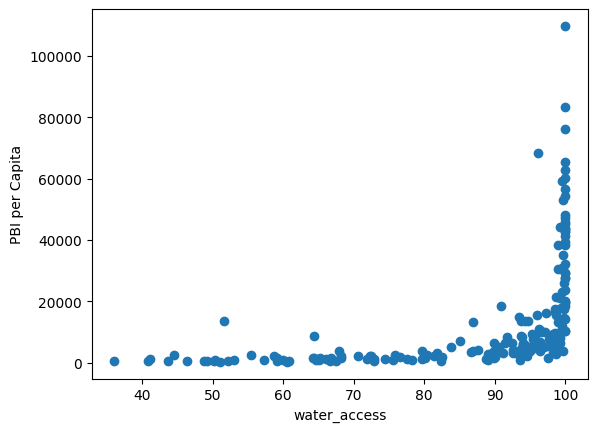

----------------------------------------------------------------------------


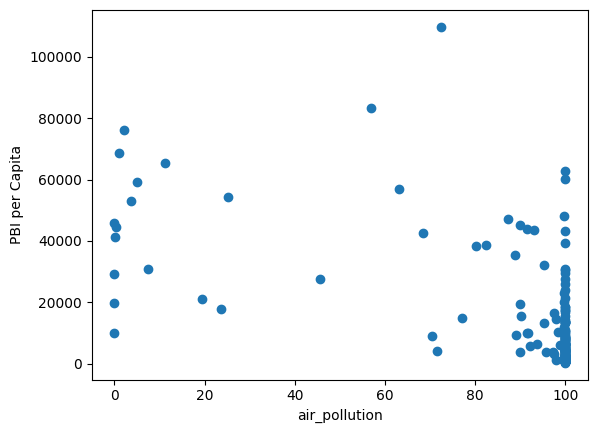

----------------------------------------------------------------------------


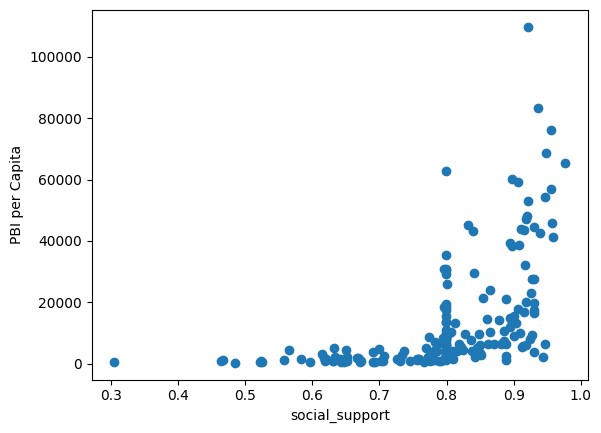

----------------------------------------------------------------------------


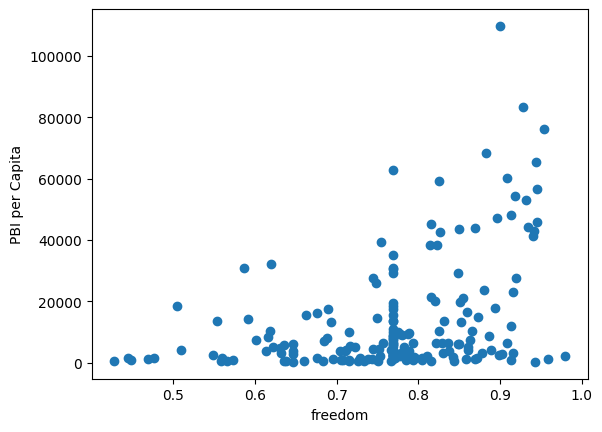

----------------------------------------------------------------------------


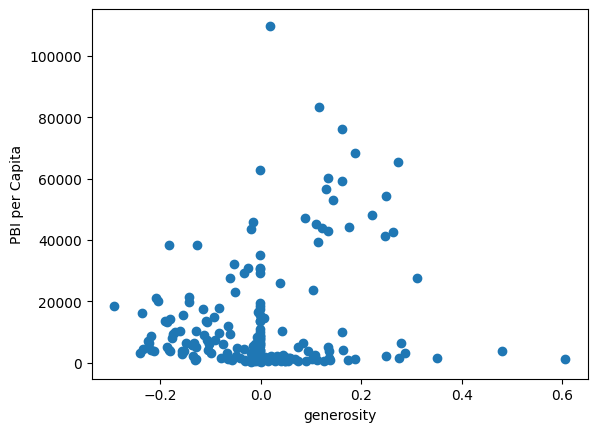

----------------------------------------------------------------------------


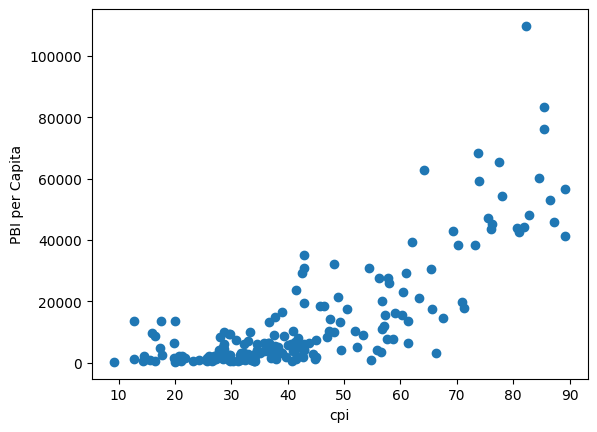

----------------------------------------------------------------------------


In [82]:
def scatter():
    cols = df.columns
    for i in cols:
        if i == "country": # Evitar hacer un gráfico inútil
            pass
        elif i == "gdp_capita": # Evitar hacer un gráfico inútil
            pass
        else:
            y = df["gdp_capita"]
            x = df[i]


            fig, ax = plt.subplots()
            ax.scatter(x, y)

            plt.ylabel("PBI per Capita")
            plt.xlabel(i)



            plt.show()
            print("----" * 19)


scatter()

Con la visualización de los datos se puede ver la relación lineal positiva de casi todas las variables con la variable objetivo. Las diferencias siendo generosidad y contaminacíon del aire que, a pesar de tener una R de Pearson positiva por sobre 0.4, al visualizar los datos se ve que esa correlación no existe. Al mismo tiempo, si bien todas las features tienen ciertos datos vacios que serán intercambiados por la media de los datos de la columna, la feature de "adult_literacy" tiene demasiados datos vacios como para llevar eso a cabo, por lo que tambien será eliminada.

In [83]:
dropping_columns(FILE)

Estas son las columnas: {0: 'electricity_access', 1: 'gdp_capita', 2: 'life_expectancy', 3: 'adult_literacy', 4: 'water_access', 5: 'air_pollution', 6: 'social_support', 7: 'freedom', 8: 'generosity', 9: 'cpi'}
Ingresa las llaver numericas de a 1 para las columnas que queres eliminar: 
-3
Para salir escriba 'n'
-5
Para salir escriba 'n'
-8
Para salir escriba 'n'
-n
Estas seguro que queres eliminar estas columnas: 
adult_literacy
air_pollution
generosity
y/n: y


Para visualizar mejor hice un Scatter plot con todas las features incluidas.

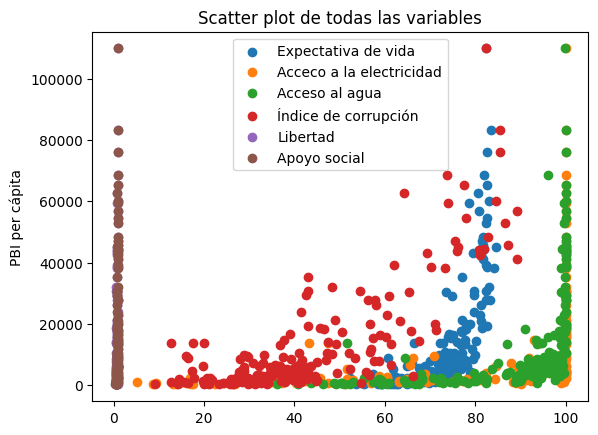

In [84]:
def scatter_all():
  # Todas las variables
  y = df["gdp_capita"]
  x_1 = df["life_expectancy"]
  x_2 = df["electricity_access"]
  x_3 = df["water_access"]
  x_4 = df["cpi"]
  x_5 = df["freedom"]
  x_6 = df["social_support"]

  plt.scatter(x_1, y, label="Expectativa de vida")
  plt.scatter(x_2, y, label="Acceco a la electricidad")
  plt.scatter(x_3, y, label="Acceso al agua")
  plt.scatter(x_4, y, label="Índice de corrupción")
  plt.scatter(x_5, y, label="Libertad")
  plt.scatter(x_6, y, label="Apoyo social")
  plt.ylabel("PBI per cápita")

  # Plot
  plt.title("Scatter plot de todas las variables")
  plt.legend()
  plt.show()

scatter_all()

Se nota una clara necesidad de estandarizar los datos gracias a este gráfico.

In [86]:
def estandarizacion():
  cols = df.columns
  for i in cols:
    df[i] = (df[i] - df[i].mean()) / df[i].std()
    df.to_csv(FILE, index=False)
  print("Se estandarizaron los datos")
#estandarizacion()

Se estandarizaron los datos


Con los datos estandarizados vuelvo a llamar a la función del scatter plot.

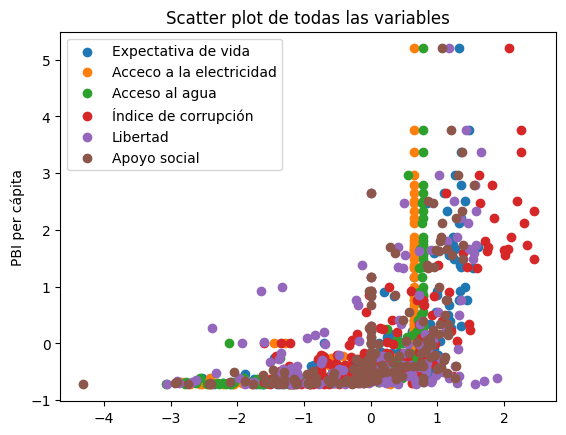

In [87]:
scatter_all()

## Hipótesis
La hipótesis que planteo es que a mayor expectativa de vida, acceso a la electricidad, acceso al agua, índice de corrupción, libertad y apoyo social, mayor va a ser el PBI per cápita del país en cuestión.

## Regresión múltiple lineal

In [106]:
x = df.drop("gdp_capita", axis=1)
y = df["gdp_capita"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(x_train, y_train)

ordenada_de_origen = model.intercept_
pendiente = model.coef_

y_pred_train = model.predict(x_train)

print(f"Coeficiente de determinación: {r2_score(y_train, y_pred_train)}")

Coeficiente de determinación: 0.6624323175640263


# Concluciones
El nivel de desarrollo de un país, medido por su PBI per cápita puede ser predecido y entendido acorde a la expectativa de vida, el acceso a la electricidad, el acceso al agua, el índice de corrupción, la libertad y el apoyo social de dicho país.
Si bien en este trabajo tome al PBI per cápita como la variable dependiente en relación con las demás. La verdadera relación entre estas variables es de interdependecia.